**Mounting drive and loading dataset in colab**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Kaggle'

In [3]:
!kaggle datasets download -d linchundan/fundusimage1000

 98% 759M/778M [00:03<00:00, 241MB/s]
100% 778M/778M [00:03<00:00, 234MB/s]


In [4]:
!unzip /content/fundusimage1000.zip -d Data1 

Archive:  /content/fundusimage1000.zip
  inflating: Data1/1000images/0.0.Normal/1ffa9627-8d87-11e8-9daf-6045cb817f5b..JPG  
  inflating: Data1/1000images/0.0.Normal/1ffa9628-8d87-11e8-9daf-6045cb817f5b..JPG  
  inflating: Data1/1000images/0.0.Normal/1ffa9629-8d87-11e8-9daf-6045cb817f5b..JPG  
  inflating: Data1/1000images/0.0.Normal/1ffa962a-8d87-11e8-9daf-6045cb817f5b..JPG  
  inflating: Data1/1000images/0.0.Normal/1ffa962b-8d87-11e8-9daf-6045cb817f5b..JPG  
  inflating: Data1/1000images/0.0.Normal/1ffa962d-8d87-11e8-9daf-6045cb817f5b..JPG  
  inflating: Data1/1000images/0.0.Normal/1ffa962e-8d87-11e8-9daf-6045cb817f5b..JPG  
  inflating: Data1/1000images/0.0.Normal/1ffa962f-8d87-11e8-9daf-6045cb817f5b..JPG  
  inflating: Data1/1000images/0.0.Normal/1ffa9630-8d87-11e8-9daf-6045cb817f5b..JPG  
  inflating: Data1/1000images/0.0.Normal/1ffa9631-8d87-11e8-9daf-6045cb817f5b..JPG  
  inflating: Data1/1000images/0.0.Normal/1ffa9632-8d87-11e8-9daf-6045cb817f5b..JPG  
  inflating: Data1/1000ima

In [5]:
!kaggle datasets download -d andrewmvd/ocular-disease-recognition-odir5k

100% 1.62G/1.62G [00:32<00:00, 51.8MB/s]
100% 1.62G/1.62G [00:32<00:00, 53.4MB/s]


In [6]:
!unzip ocular-disease-recognition-odir5k.zip -d Data2    

Streaming output truncated to the last 5000 lines.
  inflating: Data2/preprocessed_images/2179_left.jpg  
  inflating: Data2/preprocessed_images/2179_right.jpg  
  inflating: Data2/preprocessed_images/217_left.jpg  
  inflating: Data2/preprocessed_images/217_right.jpg  
  inflating: Data2/preprocessed_images/2180_left.jpg  
  inflating: Data2/preprocessed_images/2180_right.jpg  
  inflating: Data2/preprocessed_images/2181_left.jpg  
  inflating: Data2/preprocessed_images/2181_right.jpg  
  inflating: Data2/preprocessed_images/2182_left.jpg  
  inflating: Data2/preprocessed_images/2182_right.jpg  
  inflating: Data2/preprocessed_images/2183_left.jpg  
  inflating: Data2/preprocessed_images/2183_right.jpg  
  inflating: Data2/preprocessed_images/2184_left.jpg  
  inflating: Data2/preprocessed_images/2184_right.jpg  
  inflating: Data2/preprocessed_images/2185_left.jpg  
  inflating: Data2/preprocessed_images/2185_right.jpg  
  inflating: Data2/preprocessed_images/2187_left.jpg  
  inflat

In [7]:
import pandas as pd
df = pd.read_csv("/content/Data2/full_df.csv")

In [8]:
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [9]:
labels = df['labels']
print(labels)
classes = set(labels)
print(classes)

0       ['N']
1       ['N']
2       ['D']
3       ['D']
4       ['D']
        ...  
6387    ['D']
6388    ['D']
6389    ['D']
6390    ['D']
6391    ['H']
Name: labels, Length: 6392, dtype: object
{"['G']", "['H']", "['A']", "['D']", "['C']", "['M']", "['O']", "['N']"}


**Preprocessing the Images**

In [10]:
import os
def find_in_dir(index):
    path = '/content/Data2/preprocessed_images'
    for (dirpath, dirnames, filenames) in os.walk(path):
        for filename in filenames:
            name = str(os.path.join(dirpath,filename))
            f = filename.split('_')
            if(index == f[0]):  
                return name        

In [11]:
import shutil, os
os.mkdir('/content/Data')
os.mkdir('/content/Data/Datasets')
os.mkdir('/content/Data/Datasets/P')
os.mkdir('/content/Data/Datasets/Not_P')
for i,j in zip(df["labels"],df["filename"]):
    index = j.split("_")
    z = find_in_dir(index[0])
    if z == None :
        continue
    if i == "['M']":
        shutil.move(z, '/content/Data/Datasets/P')
    if i == "['N']":
      shutil.move(z,'/content/Data/Datasets/Not_P')  

In [12]:
path = '/content/Data1/1000images/9.Pathological myopia'
for (dirpath, dirnames, filenames) in os.walk(path):
  for filename in filenames:
     name = str(os.path.join(dirpath,filename))
     shutil.move(name, '/content/Data/Datasets/P')


In [13]:
path = '/content/Data1/1000images/0.0.Normal'
for (dirpath, dirnames, filenames) in os.walk(path):
  for filename in filenames:
     name = str(os.path.join(dirpath,filename))
     shutil.move(name, '/content/Data/Datasets/Not_P')

In [14]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/content/Data/Datasets', output="/content/ocular_disease_dataset", seed=1337, ratio=(0.8, 0.2))

Copying files: 3197 files [00:00, 3729.43 files/s]


**Model making**

In [15]:
train_path = '/content/ocular_disease_dataset/train'
val_path = '/content/ocular_disease_dataset/val'

In [16]:
from glob import glob
from tensorflow.keras.applications  import Xception

In [17]:
model = Xception(input_shape=(224,224,3),weights='imagenet', include_top=False)

83689472/83683744 [==============================] - 0s 0us/step


In [18]:
model.trainable = False

In [19]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [20]:
from glob import glob
folders = glob('/content/ocular_disease_dataset/train/*')

In [21]:
folders

['/content/ocular_disease_dataset/train/P',
 '/content/ocular_disease_dataset/train/Not_P']

In [22]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, MaxPooling2D

In [23]:
x = model.output

x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(len(folders), activation='softmax')(x)
model_1 = Model(inputs=model.input, outputs=predictions)    
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [24]:
from tensorflow.keras.optimizers import Adam
model_1.compile(optimizer=Adam(learning_rate = 0.01),loss='categorical_crossentropy', metrics=['accuracy'])

**Inputing data into the model**

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 shuffle = True,
                                                 class_mode = 'categorical')

Found 2556 images belonging to 2 classes.


In [27]:
val_set = val_datagen.flow_from_directory(val_path,
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          shuffle = True,
                                          class_mode = 'categorical')

Found 641 images belonging to 2 classes.


**Training of Model**

In [28]:
r = model_1.fit(training_set,
                validation_data=val_set,
                epochs=10)

Epoch 1/10
80/80 [==============================] - 60s 343ms/step - loss: 0.9248 - accuracy: 0.9053 - val_loss: 0.0713 - val_accuracy: 0.9719
Epoch 2/10
80/80 [==============================] - 26s 321ms/step - loss: 0.0751 - accuracy: 0.9750 - val_loss: 0.0831 - val_accuracy: 0.9657
Epoch 3/10
80/80 [==============================] - 26s 321ms/step - loss: 0.0814 - accuracy: 0.9718 - val_loss: 0.0943 - val_accuracy: 0.9719
Epoch 4/10
80/80 [==============================] - 26s 321ms/step - loss: 0.0919 - accuracy: 0.9632 - val_loss: 0.2852 - val_accuracy: 0.9516
Epoch 5/10
80/80 [==============================] - 26s 322ms/step - loss: 0.1097 - accuracy: 0.9652 - val_loss: 0.0647 - val_accuracy: 0.9704
Epoch 6/10
80/80 [==============================] - 26s 322ms/step - loss: 0.0617 - accuracy: 0.9765 - val_loss: 0.0765 - val_accuracy: 0.9672
Epoch 7/10
80/80 [==============================] - 26s 320ms/step - loss: 0.0575 - accuracy: 0.9812 - val_loss: 0.0769 - val_accuracy: 0.9719

**Training outcome**

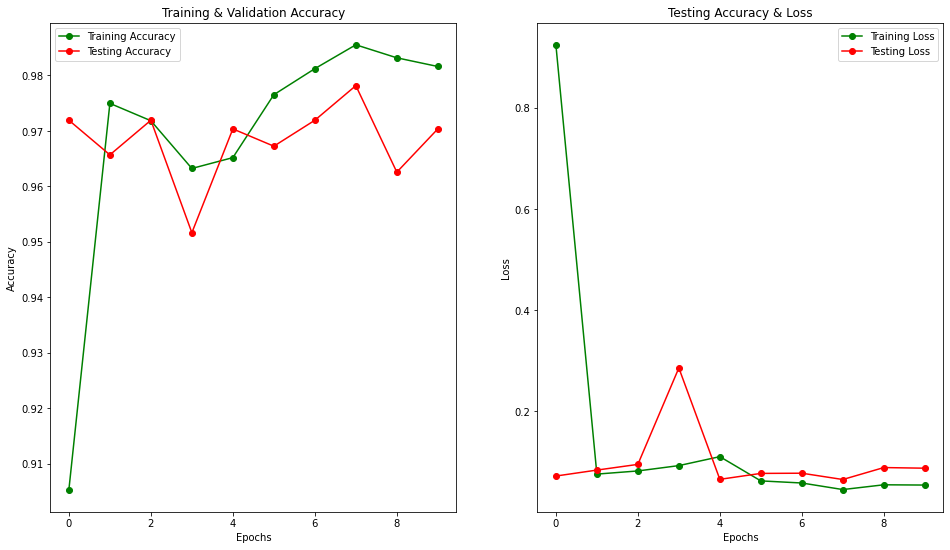

In [29]:
import matplotlib.pyplot as plt
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = r.history['accuracy']
train_loss = r.history['loss']
val_acc = r.history['val_accuracy']
val_loss = r.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

In [30]:
import numpy as np


In [32]:
val_set3 = val_datagen.flow_from_directory(val_path,
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          shuffle = False,
                                          class_mode = 'categorical')

Found 641 images belonging to 2 classes.


In [33]:
Y_pred = model_1.predict_generator(val_set3, len(val_set3.classes)//val_set3.batch_size +1)
Y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


array([[9.9995160e-01, 4.8375896e-05],
       [1.0000000e+00, 2.2326538e-10],
       [1.0000000e+00, 5.5888176e-08],
       ...,
       [7.9198182e-01, 2.0801818e-01],
       [8.5558021e-01, 1.4441982e-01],
       [4.9274918e-02, 9.5072514e-01]], dtype=float32)

In [34]:
y_pred = np.argmax(Y_pred, axis=1)

In [35]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**Evaluating the model**

In [36]:
model_1.evaluate(val_set3)

21/21 [==============================] - 5s 253ms/step - loss: 0.0868 - accuracy: 0.9704


[0.08679324388504028, 0.9703587889671326]

**Results**

In [37]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(val_set3.classes,y_pred)
confusion_mat

array([[581,   2],
       [ 17,  41]])

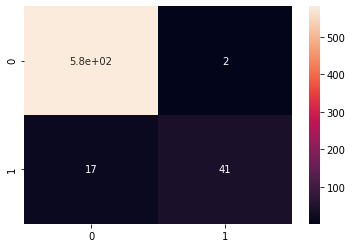

In [38]:
import seaborn as sns
sns.heatmap(confusion_mat,annot=True)

In [39]:

from scipy.stats import norm
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [43]:
val_set3.class_indices

{'Not_P': 0, 'P': 1}

In [41]:
print(classification_report(val_set3.classes, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       583
           1       0.95      0.71      0.81        58

    accuracy                           0.97       641
   macro avg       0.96      0.85      0.90       641
weighted avg       0.97      0.97      0.97       641



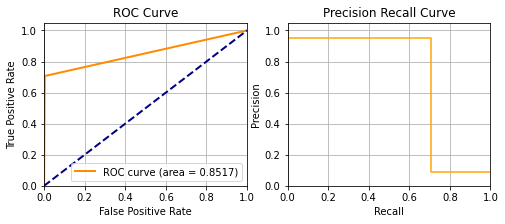

In [44]:
fpr, tpr, _ = roc_curve(val_set3.classes, y_pred)

# Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
roc_auc = auc(fpr, tpr)

# Calculate precision and recall from true labels vs score values
precision, recall, _ = precision_recall_curve(val_set.classes, y_pred)

plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1,2,2)
plt.step(recall, precision, color='orange', where='post')
# plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve')
plt.grid(True)